
# Convolutional Neural Network For Image Classification

- CNN이란?
- Convolutional Neural Network For Image Classification
  - Approach 1 :
  - Approach 2 :

## CNN(Convolutional Neural Network)
- CNN은 ANN 이전에 Convolution 연산을 통해 이미지의 특징을 자동으로 찾는 기능을 추가한 것이다.

- CNN의 구성은 합성곱 연산 -> 풀링 -> 평탄화 -> 밀집 신경망 으로 기본적으로 구성된다.

### Importing the Libraries & Loading the image

- tensorflow로 학습을 하기위해선 training_set과 test_set으로 폴더를 나누어서 관리해야된다.

In [44]:
import cv2
import numpy as np
import os
import zipfile
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow .keras.models import Sequential
# Convolution 연산을 위한 import
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
# 이미지 전처리를 도와주는 객체( 테스트 데이터, 검증 데이터 분할, 이미지 늘리기 등 )
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import seaborn as sns # 데이터 시각화
import matplotlib.pyplot as plt # 그래프 생성
tf.__version__

'2.15.0'

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
path = '/content/drive/MyDrive/Colab Notebooks/Project/Computer Vision/src/Datasets/homer_bart_2.zip'
zip_object = zipfile.ZipFile(file= path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [47]:
# tf를 사용하여 이미지 loading 방법
# tf.keras.preprocessing.image.load_img('')

### Train and Test set
- tensorflow의 ImageDataGenerator 객체를 활용하여 데이터 전처리
  - rescale : rescale 값은 이미지의 픽셀 값을 0과 1 사이의 값 정규화 하는데 사용한다. 예를 들어, rescale=1./255는 이미지의 픽셀 값을 0과 1 사이의 값으로 조정하고 rescale=2./255 - 1 는 이미지를 -1과 1 사이의 값으로 조정한다. "1./255"에서 1.은 1.0(소수점 표현)이고 /는 나눗셈 연산 255는 나눌 값이다(색상의 값 범위)
  - 이미지 증강 설정: 이미지 데이터가 적을때 전처리를 통해 이미지 데이터를 늘릴 수 있다. 다음과 같은 매개변수를 활용하라
    - horizontal_flip : 이미지 수평 뒤집기
    - rotation_range : 이미지 회전 정도
    - zoom_range=0.2 : 이미지 확대 및 축소

In [48]:
training_generator = ImageDataGenerator(rescale= 1./255, rotation_range=7, horizontal_flip =True, zoom_range=0.2)

In [49]:
# flow_from_directory : 실제 데이터 로드, shuffle = true 한 이유는 순서가 일정하면 특징이 아닌 순서를 통한 학습을 하기때문
train_dataset = training_generator.flow_from_directory('/content/homer_bart_2/training_set', target_size = (64, 64), batch_size =8, class_mode ='categorical', shuffle = True)

Found 215 images belonging to 2 classes.


In [50]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [51]:
train_dataset.class_indices

{'bart': 0, 'homer': 1}

In [52]:
test_generator = ImageDataGenerator(1./255)
test_dataset = test_generator.flow_from_directory('/content/homer_bart_2/test_set', target_size = (64, 64), batch_size =1, class_mode = 'categorical', shuffle = False)

Found 54 images belonging to 2 classes.


# Building and training the neural network

In [53]:
network = Sequential()
# conv2D : convolutional층을 생성
# 매개변수 : filters = 커널의 개수, kernel_size = 커널의 크기, activation = 특징맵에 적용할 활성화 함수
network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = (64,64,3)))
# conv층에서 생성된 특징맵을 폴링을 이용하여 특징을 확실한 특징 필터링
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
network.add(MaxPool2D(pool_size=(2,2)))

# 행렬형태의 특징맵을 백터화(일렬로 세움)
network.add(Flatten())

network.add(Dense(units = 577, activation ='relu'))

network.add(Dense(units = 577, activation ='relu'))
# softmax는 sigmoid와 달리 이진분류가 아닌 다분류 문제에서 사
network.add(Dense(units = 2, activation ='softmax'))

# 요약을 활용하여 은닉층의 뉴런 개수를 정하자
# (1152+2)/2 =577
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 32)         

In [54]:
# loss 함수는 이진분류(binary)이면 binary_crossentropy를 사용, 다분류(categorical)이면 해당 함수를 사용한다.
network.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics =['accuracy'])

In [55]:
history = network.fit_generator(train_dataset, epochs=50)

Epoch 1/50


<ipython-input-55-5df4b5f3c6a2>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = network.fit_generator(train_dataset, epochs=50)


27/27 [==============================] - 3s 57ms/step - loss: 0.6690 - accuracy: 0.6186
Epoch 2/50
27/27 [==============================] - 2s 56ms/step - loss: 0.5767 - accuracy: 0.6884
Epoch 3/50
27/27 [==============================] - 2s 56ms/step - loss: 0.4974 - accuracy: 0.7535
Epoch 4/50
27/27 [==============================] - 2s 72ms/step - loss: 0.4640 - accuracy: 0.7953
Epoch 5/50
27/27 [==============================] - 2s 83ms/step - loss: 0.4491 - accuracy: 0.8093
Epoch 6/50
27/27 [==============================] - 2s 55ms/step - loss: 0.4050 - accuracy: 0.8233
Epoch 7/50
27/27 [==============================] - 2s 55ms/step - loss: 0.3312 - accuracy: 0.8465
Epoch 8/50
27/27 [==============================] - 2s 56ms/step - loss: 0.3376 - accuracy: 0.8419
Epoch 9/50
27/27 [==============================] - 2s 55ms/step - loss: 0.2973 - accuracy: 0.8605
Epoch 10/50
27/27 [==============================] - 2s 58ms/step - loss: 0.2322 - accuracy: 0.8977
Epoch 11/50
27/27 [=

 ### Evaluating the neural network(검증셋으로 평가)

In [56]:
# softmax 활성화 함수를 사용했기 때문에 각 클래스별로 확률을 나타낸다
# ['클래스1의 확률', '클래스2의 확률' ...]
predictions = network.predict(test_dataset)
# np.argmax() 함수를 활용하여 리스트에서 최대값을 리스트로 반환한다.
# axis는 각 행에서 실행하라는
predictions = np.argmax(predictions, axis = 1)

13/54 [======>.......................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


54/54 [==============================] - 0s 5ms/step


In [57]:
# 이전 분류기에 비해 가장 높다
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, predictions)


0.9629629629629629

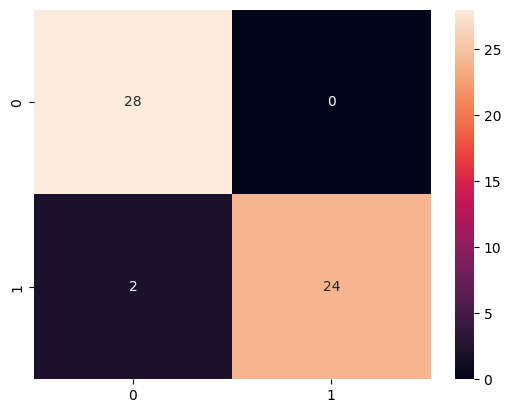

In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_dataset.classes, predictions)
sns.heatmap(cm, annot = True);

In [59]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       1.00      0.92      0.96        26

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



### Saving and loading the model

In [156]:
# 신경망 구조 저장
model_json = network.to_json()
with open('network.json','w') as json_file:
  json_file.write(model_json)

In [157]:
# 가중치 저장
from keras.models import save_model
network_saved = save_model(network, '/content/weights.hdf5')

<ipython-input-157-f7009c027066>:3: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  network_saved = save_model(network, '/content/weights.hdf5')


In [158]:
# 신경망 구조 불러오기
with open('network.json', 'r') as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_3_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Conv2D", "config": {"name": "conv2d_3", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 64, 64, 3], "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null

In [159]:
# 신경망 가중치 불러오기 및 compile설정
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('weights.hdf5')
network_loaded.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [160]:
network_loaded.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 32)         

### 완성된 모델에서 단일 이미지 분류 결과값 추출
- image load를 통한 예측

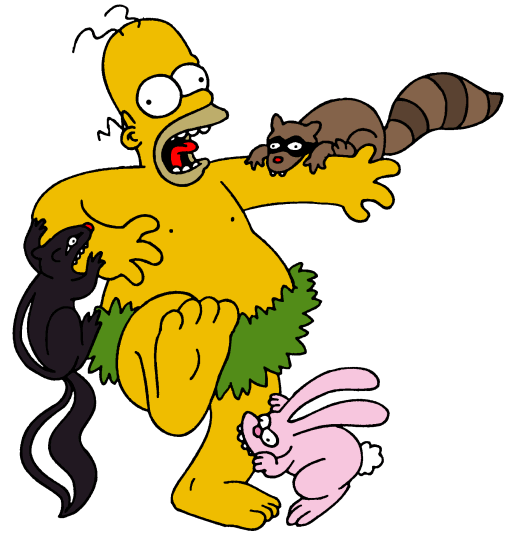

(536, 514, 3)


In [167]:
image = cv2.imread('/content/homer_bart_2/test_set/homer/homer15.bmp')
cv2_imshow(image)
print(image.shape)

In [168]:
# 신경망에 맞춰 전처리
image = cv2.resize(image, (64, 64))

In [169]:
# 이미지 정규화(0~255 ->0~1)
image = image / 255
#print(image)
image.shape

(64, 64, 3)

In [170]:
# image를 배치형태로 바꿔야한다 (배열형태)
# [이미지번호, 이미지]
# reshape의 -1 자리는 배열의 수를 정하는것이다, 만약 이미지가 10개면 10을 넣어야된다.
# -1은 자동 계산이다.
image = image.reshape(-1, 64, 64, 3)
image.shape

(1, 64, 64, 3)

In [171]:
result = network_loaded.predict(image)
result[0]

1/1 [==============================] - 0s 23ms/step


array([1.1924404e-06, 9.9999881e-01], dtype=float32)

In [172]:
result = np.argmax(result,axis=1)
print(result)

[1]


In [173]:
test_dataset.class_indices

{'bart': 0, 'homer': 1}

In [174]:
if result == 0:
  print('Bart')
else:
  print('Homer')

Homer
